In [1]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_folder: Path = Path("../data/benchmark_output")
benchmark_speed_file: Path = data_folder / "benchmark_results.csv"
benchmark_compression_file: Path = data_folder / "bits_per_int_2.csv"
sns.set(rc={'figure.figsize':(30,20)})
sns.set(font_scale=4)

In [3]:
## Preprocessing

NAME: str = "name"
INPUT_DATA: str = "input_data"
ENCODING_TYPE: str = "Encoding Type"
OPERATION: str = "process_type"
SORTED: str = "sorted"
POS_SIZE: str = "Size of PosList"
LIBRARY: str = "Library"
CPU_TIME_IN_NS: str = "Cpu time (in ns)"
CPU_TIME_IN_MS: str = "Cpu time (in ms)"

In [4]:
def to_int(text: str) -> int:
    only_number: str = ''.join(c for c in text if c.isdigit())
    if only_number == "":
        return 0
    return int(only_number)

def complete_with_seq(library: str, process_type: str) -> str:
    if "seq" in process_type:
        return library + "_seq"
    return library

def load_benchmark_results(path: Path) -> DataFrame:
    benchmark_speeds: DataFrame = pd.read_csv(path, skiprows=9, skipfooter=1)
    benchmark_speeds = benchmark_speeds.loc[~benchmark_speeds["name"].str.contains("write_BitsPerInt")]
    benchmark_speeds[NAME] = [lib.replace("SIMDCompressionAndIntersection", "SIMDCAI").replace("with_select", "with_direct")
                              for lib in benchmark_speeds[NAME]]

    benchmark_speeds[INPUT_DATA] = [name.split("get_with_")[1]
                                    for name in benchmark_speeds[NAME]]
    benchmark_speeds[ENCODING_TYPE] = [name.split("/")[1].split("_benchmark")[0] for name in benchmark_speeds[NAME]]
    benchmark_speeds[OPERATION] = [name.split("_benchmark_")[1].split("_get")[0] for name in benchmark_speeds[NAME]]
    benchmark_speeds[LIBRARY] = [name.split("_")[0] for name in benchmark_speeds[ENCODING_TYPE]]
    benchmark_speeds[SORTED] = ["sorted" in input_data for input_data in benchmark_speeds[INPUT_DATA]]
    benchmark_speeds[POS_SIZE] = [to_int(input_data) for input_data in benchmark_speeds[INPUT_DATA]]
    benchmark_speeds[ENCODING_TYPE] = [complete_with_seq(library, process_type)
                                   for library, process_type in
                                   zip(benchmark_speeds[ENCODING_TYPE], benchmark_speeds[OPERATION])]
    benchmark_speeds = benchmark_speeds[benchmark_speeds[SORTED] == False]
    benchmark_speeds = benchmark_speeds.rename(columns={"cpu_time": CPU_TIME_IN_NS})
    benchmark_speeds[CPU_TIME_IN_MS] = [in_ns / 1e3 for in_ns in benchmark_speeds[CPU_TIME_IN_NS]]

    return benchmark_speeds

benchmark_speeds: DataFrame = load_benchmark_results(benchmark_speed_file)
benchmark_speeds


<ipython-input-4-9c495dcb33f0>:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  benchmark_speeds: DataFrame = pd.read_csv(path, skiprows=9, skipfooter=1)


,name,iterations,real_time,Cpu time (in ns),time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,input_data,Encoding Type,process_type,Library,sorted,Size of PosList,Cpu time (in ms)
0,BenchmarkColumnCompressionFixture/unencoded_be...,87223,13685.1,7710.34,ns,NaN,NaN,NaN,NaN,NaN,small_numbers,unencoded,encoding,unencoded,False,0,7.71034
1,BenchmarkColumnCompressionFixture/unencoded_be...,122634,16155.9,9718.34,ns,NaN,NaN,NaN,NaN,NaN,small_numbers,unencoded,decoding,unencoded,False,0,9.71834
4,BenchmarkColumnCompressionFixture/unencoded_be...,65109,12557.2,9124.78,ns,NaN,NaN,NaN,NaN,NaN,huge_numbers,unencoded,encoding,unencoded,False,0,9.12478
5,BenchmarkColumnCompressionFixture/unencoded_be...,80475,11176.2,8071.40,ns,NaN,NaN,NaN,NaN,NaN,huge_numbers,unencoded,decoding,unencoded,False,0,8.07140
6,BenchmarkColumnCompressionFixture/unencoded_be...,85911,16338.6,11114.70,ns,NaN,NaN,NaN,NaN,NaN,random_walk,unencoded,encoding,unencoded,False,0,11.11470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,67116,10378.5,10377.90,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_100,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,False,100,10.37790
745,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,63886,10972.1,10971.40,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_1000,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,False,1000,10.97140
746,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,41220,17108.9,17108.70,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_10000,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,False,10000,17.10870
747,BenchmarkColumnCompressionFixture/SIMDCAI_simd...,8948,77719.9,77716.30,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_100000,SIMDCAI_simdframeofreference_with_direct_seq,decoding_points_seq,SIMDCAI,False,100000,77.71630


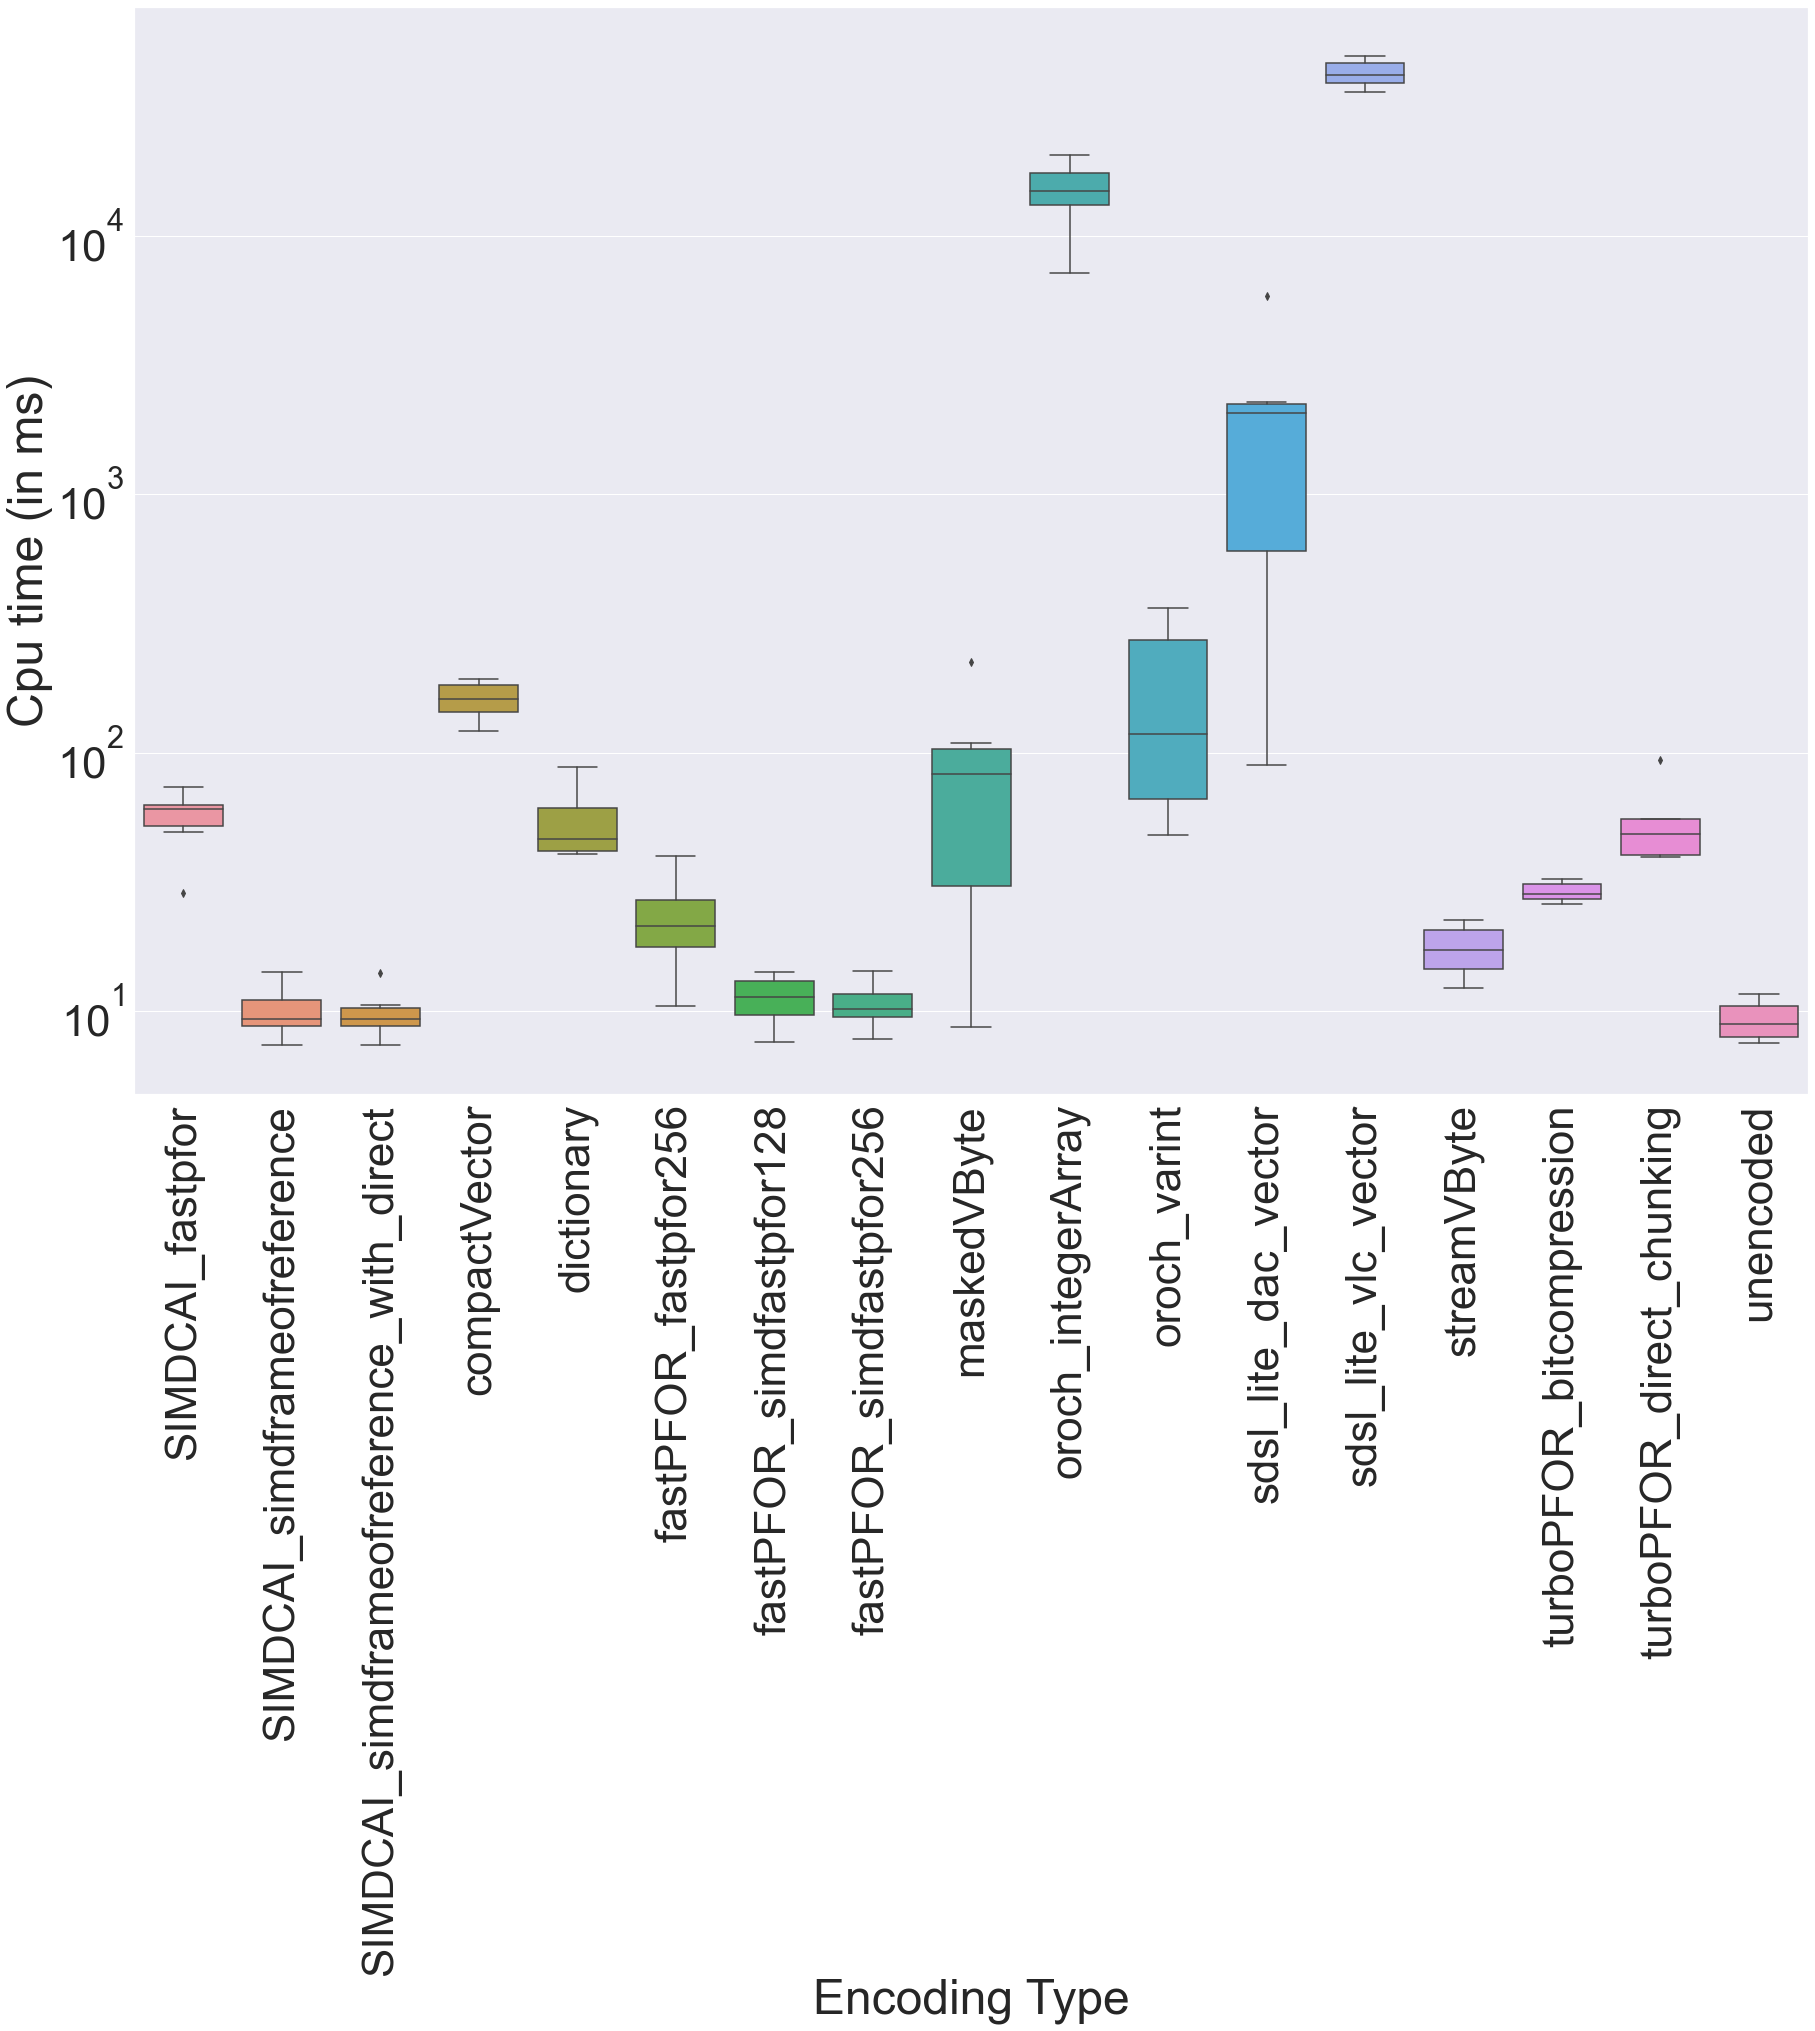

In [5]:
# Decoding over synthetic datasets
decoding: DataFrame = benchmark_speeds.loc[benchmark_speeds[OPERATION] == "decoding"]
only_without_poslist: DataFrame = decoding[decoding[POS_SIZE] == 0]
order: List[str] = sorted(decoding[ENCODING_TYPE].drop_duplicates())
boxplot: sns.boxplot = sns.boxplot(data=only_without_poslist, x=ENCODING_TYPE, y=CPU_TIME_IN_MS, order=order)
plt.xticks(rotation=90)
boxplot.set_yscale("log")
plt.savefig("visualizations/libraries_decoding.svg", bbox_inches = "tight")

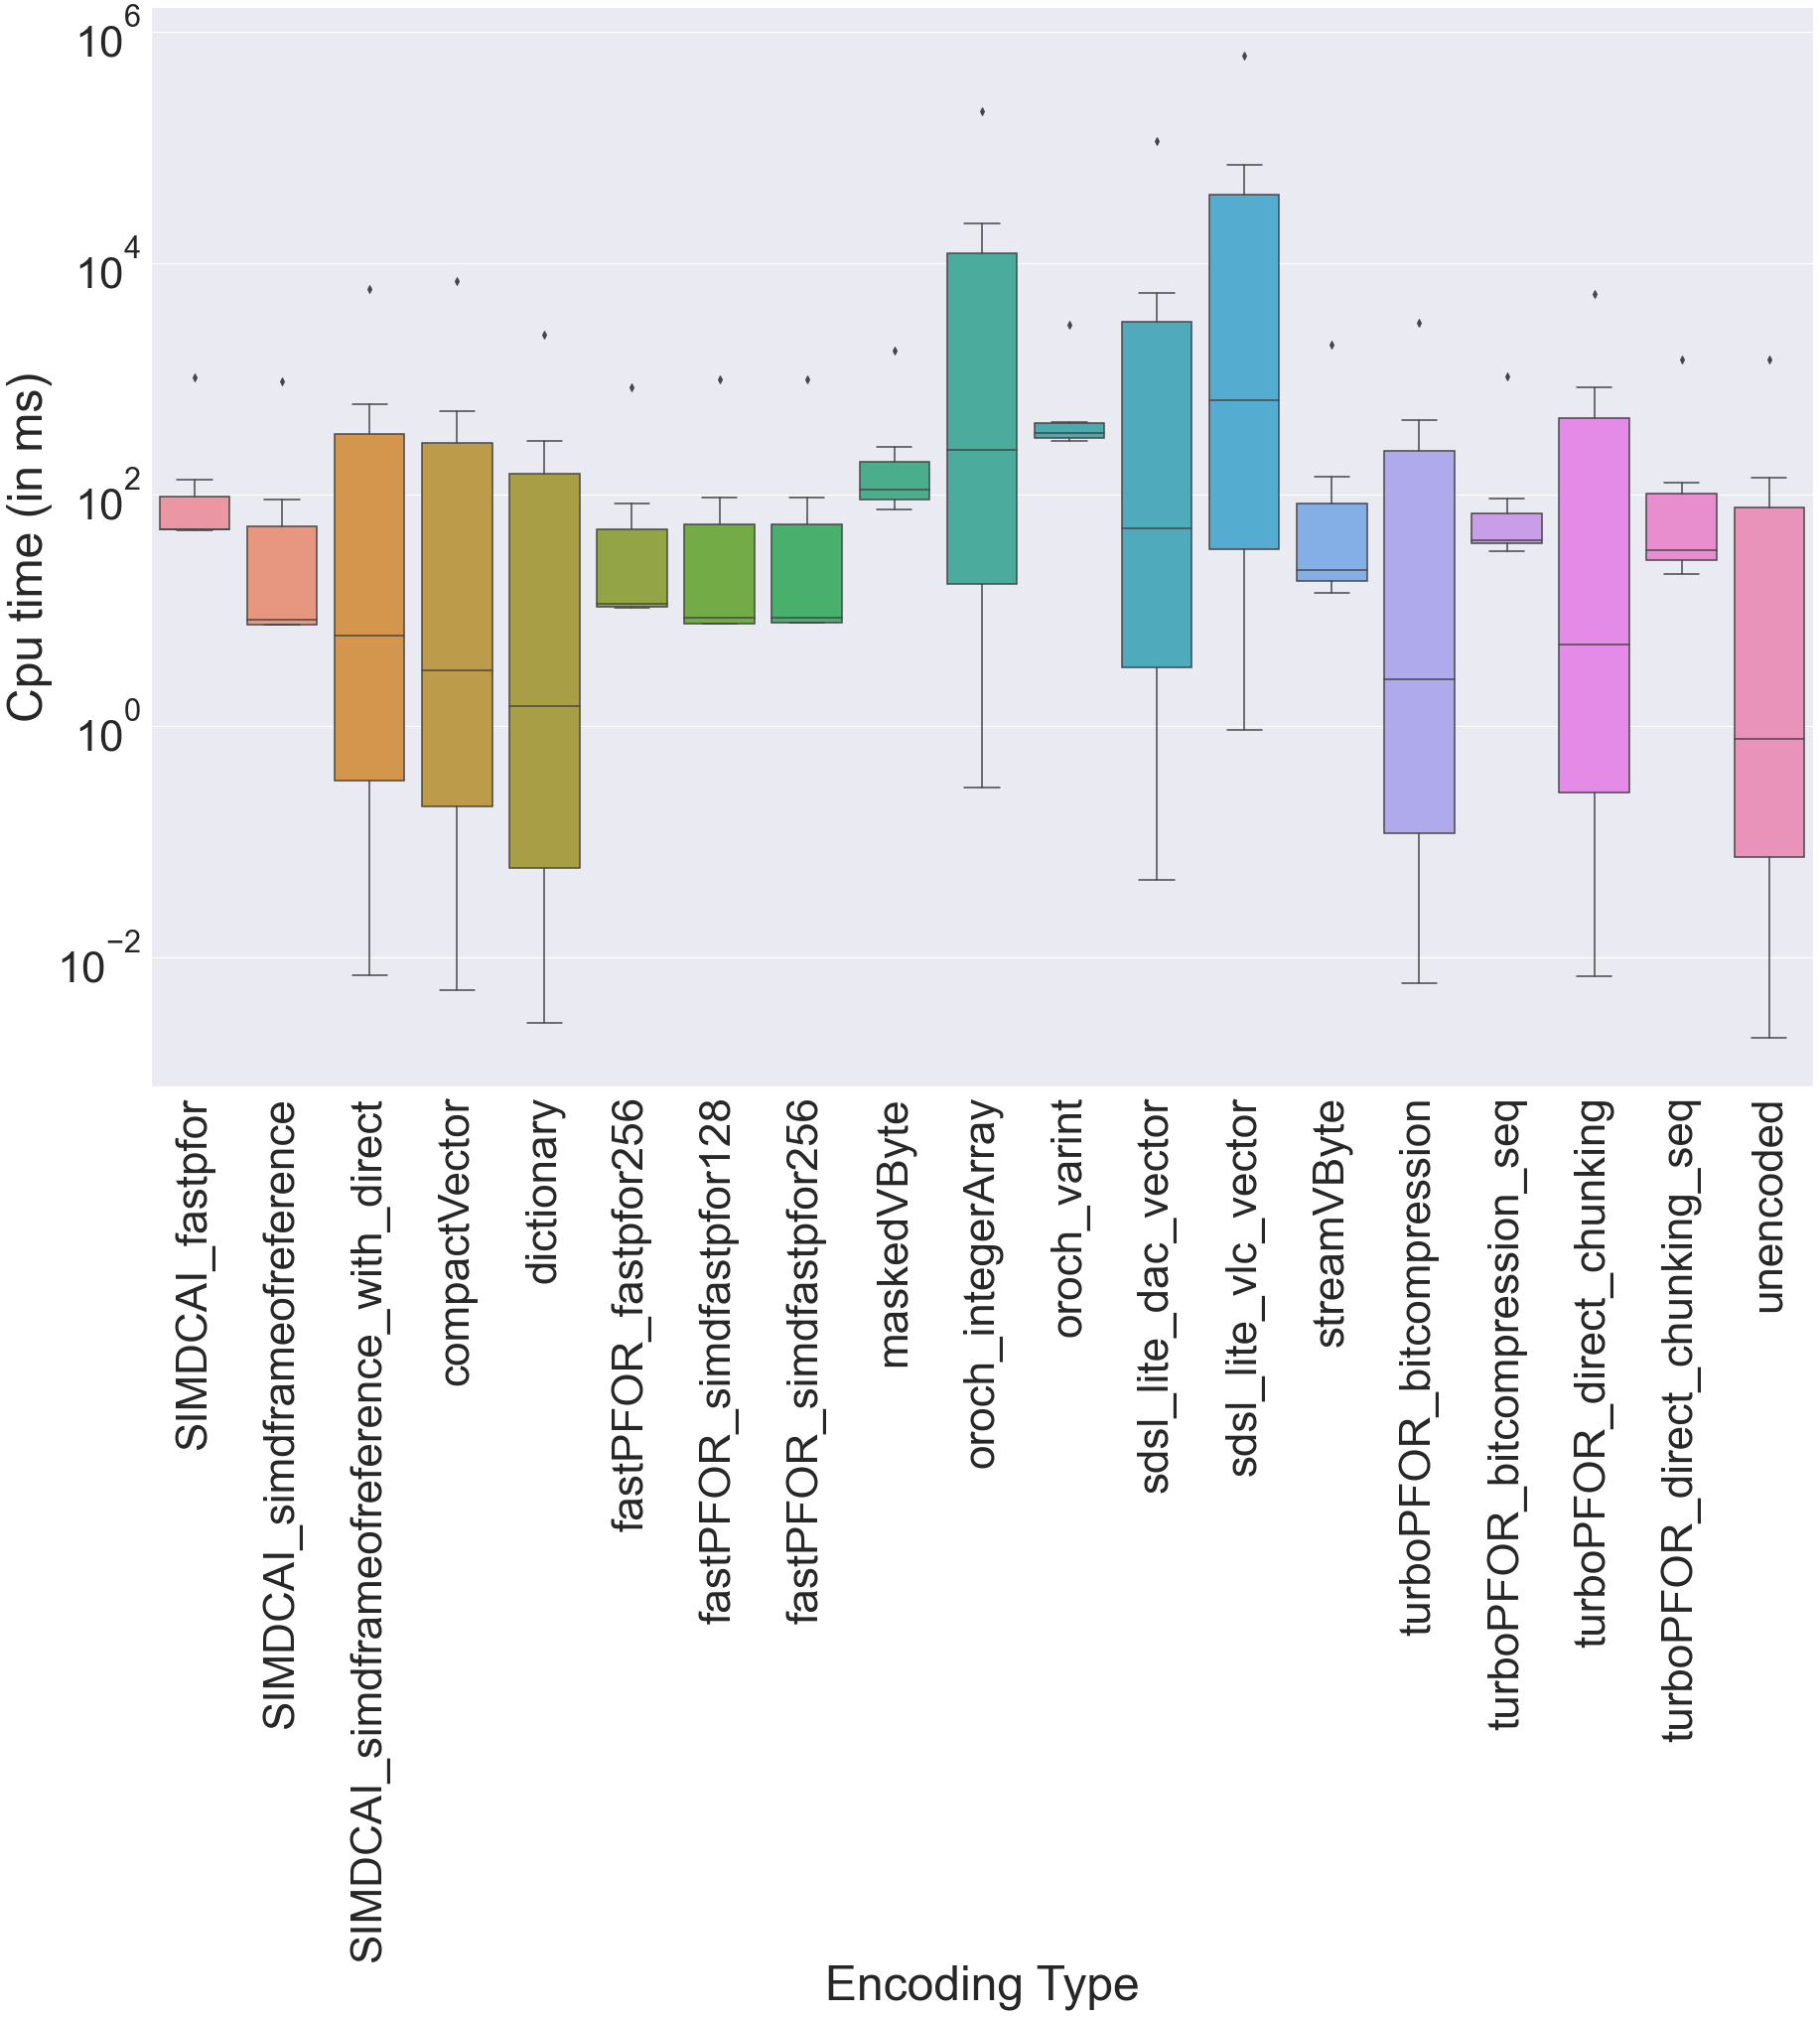

In [6]:
decoding_points: DataFrame = benchmark_speeds[(benchmark_speeds[OPERATION] == "decoding_points") | (benchmark_speeds[OPERATION] == "decoding_points_seq")]
without_simdcai_seq: DataFrame = decoding_points[~(decoding_points[ENCODING_TYPE] == "SIMDCAI_simdframeofreference_with_direct_seq")]
order: List[str] = sorted(without_simdcai_seq[ENCODING_TYPE].drop_duplicates())
boxplot: sns.boxplot = sns.boxplot(data=decoding_points, x=ENCODING_TYPE, y=CPU_TIME_IN_MS, order=order)
plt.xticks(rotation=90)
boxplot.set_yscale("log")
plt.savefig("visualizations/libraries_decoding_points.svg", bbox_inches = "tight")

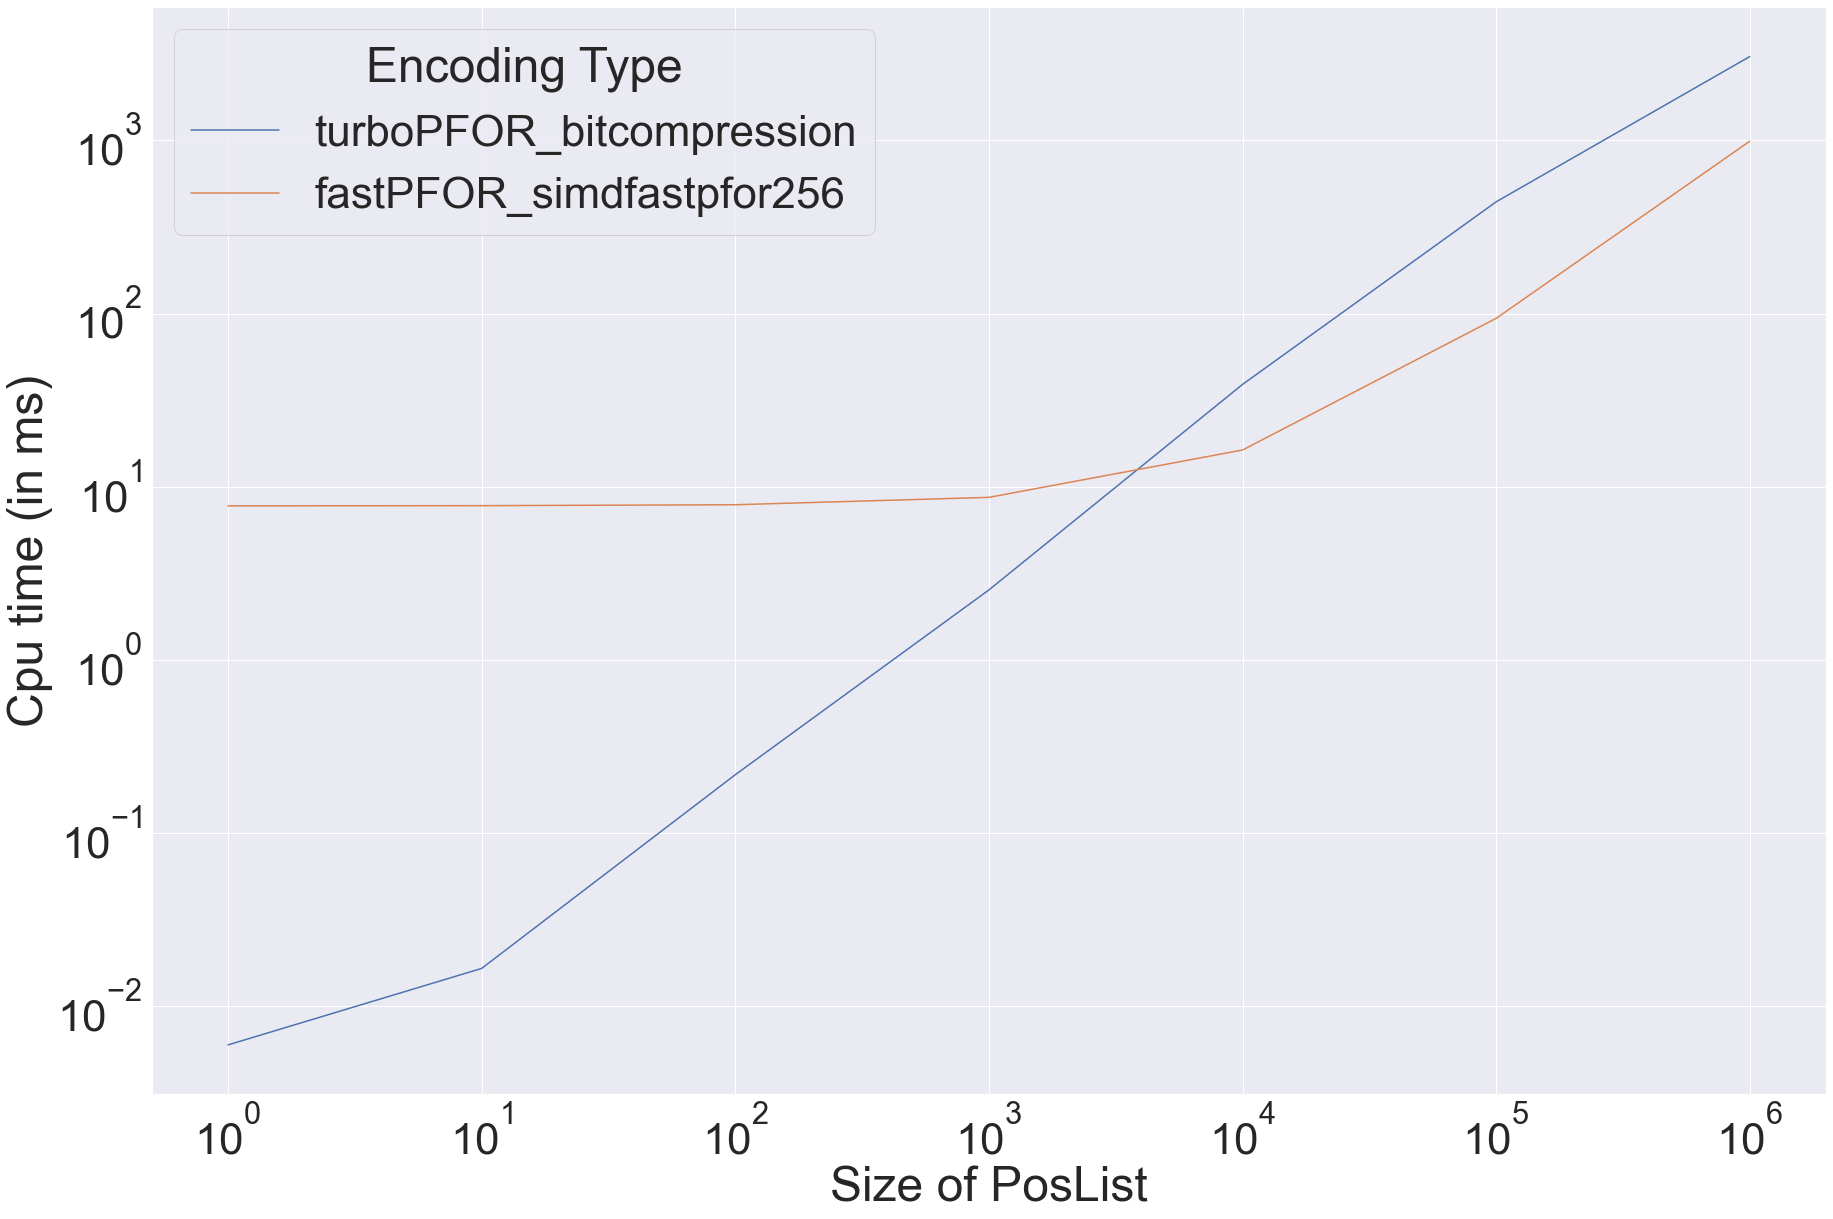

In [7]:
only_two_libraries: DataFrame = decoding_points[(decoding_points[ENCODING_TYPE] == "turboPFOR_bitcompression")
                                                |(decoding_points[ENCODING_TYPE] == "fastPFOR_simdfastpfor256")]
lineplot = sns.lineplot(data=only_two_libraries, x=POS_SIZE, y=CPU_TIME_IN_MS, hue=ENCODING_TYPE)
lineplot.set_yscale("log")
lineplot.set_xscale("log")
plt.savefig("visualizations/libraries_lineplot_points.svg", bbox_inches = "tight")


In [8]:
only_two_libraries

,name,iterations,real_time,Cpu time (in ns),time_unit,bytes_per_second,items_per_second,label,error_occurred,error_message,input_data,Encoding Type,process_type,Library,sorted,Size of PosList,Cpu time (in ms)
196,BenchmarkColumnCompressionFixture/turboPFOR_bi...,100000000,1.157370e+01,5.970610e+00,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_1,turboPFOR_bitcompression,decoding_points,turboPFOR,False,1,0.005971
197,BenchmarkColumnCompressionFixture/turboPFOR_bi...,31175556,2.552100e+01,1.650890e+01,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_10,turboPFOR_bitcompression,decoding_points,turboPFOR,False,10,0.016509
198,BenchmarkColumnCompressionFixture/turboPFOR_bi...,4365413,3.177120e+02,2.170390e+02,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_100,turboPFOR_bitcompression,decoding_points,turboPFOR,False,100,0.217039
199,BenchmarkColumnCompressionFixture/turboPFOR_bi...,231461,4.083620e+03,2.534400e+03,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_1000,turboPFOR_bitcompression,decoding_points,turboPFOR,False,1000,2.534400
200,BenchmarkColumnCompressionFixture/turboPFOR_bi...,26886,6.207590e+04,3.899350e+04,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_10000,turboPFOR_bitcompression,decoding_points,turboPFOR,False,10000,38.993500
201,BenchmarkColumnCompressionFixture/turboPFOR_bi...,3095,6.252920e+05,4.422850e+05,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_100000,turboPFOR_bitcompression,decoding_points,turboPFOR,False,100000,442.285000
202,BenchmarkColumnCompressionFixture/turboPFOR_bi...,184,4.194330e+06,3.053050e+06,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_1000000,turboPFOR_bitcompression,decoding_points,turboPFOR,False,1000000,3053.050000
588,BenchmarkColumnCompressionFixture/fastPFOR_sim...,90517,7.756670e+03,7.755880e+03,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_1,fastPFOR_simdfastpfor256,decoding_points,fastPFOR,False,1,7.755880
589,BenchmarkColumnCompressionFixture/fastPFOR_sim...,90049,7.775160e+03,7.774950e+03,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_10,fastPFOR_simdfastpfor256,decoding_points,fastPFOR,False,10,7.774950
590,BenchmarkColumnCompressionFixture/fastPFOR_sim...,88867,7.871240e+03,7.870990e+03,ns,NaN,NaN,NaN,NaN,NaN,av_numbers_get_poslist_100,fastPFOR_simdfastpfor256,decoding_points,fastPFOR,False,100,7.870990


In [9]:
decoding.groupby([ENCODING_TYPE], as_index=False)[CPU_TIME_IN_MS].mean()

,Encoding Type,Cpu time (in ms)
0,SIMDCAI_fastpfor,56.184550
1,SIMDCAI_simdframeofreference,10.084355
2,SIMDCAI_simdframeofreference_with_direct,9.906552
3,compactVector,161.349000
4,dictionary,54.595233
5,fastPFOR_fastpfor256,23.074267
6,fastPFOR_simdfastpfor128,11.198433
7,fastPFOR_simdfastpfor256,10.675508
8,maskedVByte,87.078183
9,oroch_integerArray,14820.253333


In [11]:
only_relevant_pos_size = without_simdcai_seq[without_simdcai_seq[POS_SIZE].isin([1,1000,1000000])]
only_relevant_pos_size.groupby([ENCODING_TYPE, POS_SIZE], as_index=False)[CPU_TIME_IN_MS].mean()

,Encoding Type,Size of PosList,Cpu time (in ms)
0,SIMDCAI_fastpfor,1,49.220800
1,SIMDCAI_fastpfor,1000,50.254700
2,SIMDCAI_fastpfor,1000000,1036.040000
3,SIMDCAI_simdframeofreference,1,7.442910
4,SIMDCAI_simdframeofreference,1000,8.273910
5,SIMDCAI_simdframeofreference,1000000,948.109000
6,SIMDCAI_simdframeofreference_with_direct,1,0.006901
7,SIMDCAI_simdframeofreference_with_direct,1000,6.010920
8,SIMDCAI_simdframeofreference_with_direct,1000000,6044.060000
9,compactVector,1,0.005223


In [10]:
1